# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [1]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-09 11:54:26--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M   162MB/s    in 0.2s    

2023-03-09 11:54:27 (162 MB/s) - ‘train.csv’ saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [2]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens

def split_doc(text):
    '''
    Returns -> tuple:
    1. list -> sentences
    2. list -> tokens
    '''
    doc = nlp(text)
    sentences = [sent for sent in doc.sents]
    tokens = [token for token in doc if not token.is_punct and not token.is_stop]

    return sentences, tokens

# '*' iterates over each single sample of dfs
dfs['sentences'], dfs['tokens'] = zip(*dfs['text'].apply(split_doc))

##TODO print the first sentence of the first document in your sample

print(dfs.iloc[0]['sentences'][0])

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Anno Captures Japan


In [3]:
dfs.head()

,label,title,lead,text,sentences,tokens
4533,sport,Anno Captures Japan #39;s 6th Judo Gold; Inoue...,"Aug. 20 (Bloomberg) -- Noriko Anno, four-time ...",Anno Captures Japan #39;s 6th Judo Gold; Inoue...,"[(Anno, Captures, Japan), (#, 39;s, 6th, Judo,...","[Anno, Captures, Japan, 39;s, 6th, Judo, Gold,..."
28981,business,Firearms police get stun guns,Police firearms officers will be allowed to us...,Firearms police get stun guns Police firearms ...,"[(Firearms, police, get, stun, guns, Police, f...","[Firearms, police, stun, guns, Police, firearm..."
115927,business,Verizon to enter wireless consolidation fray?,Verizon Communications Inc. may be getting int...,Verizon to enter wireless consolidation fray? ...,"[(Verizon, to, enter, wireless, consolidation,...","[Verizon, enter, wireless, consolidation, fray..."
14549,business,Japan #39;s Supreme Court clears way for MTFG ...,TOKYO : Japan #39;s Supreme Court cleared the ...,Japan #39;s Supreme Court clears way for MTFG ...,"[(Japan, #, 39;s, Supreme, Court, clears, way,...","[Japan, 39;s, Supreme, Court, clears, way, MTF..."
100021,world,Iraqi Prime Minister Encouraged to Meet Opponents,An international conference on Iraq is expecte...,Iraqi Prime Minister Encouraged to Meet Oppone...,"[(Iraqi, Prime, Minister, Encouraged, to, Meet...","[Iraqi, Prime, Minister, Encouraged, Meet, Opp..."


In [4]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)


def tokens_to_text(sample_of_tokens):
    tokens_text = [token.text.lower() for token in sample_of_tokens]

    return tokens_text

dfs['tokens_text'] = dfs['tokens'].apply(tokens_to_text)

##TODO print the tokens (x.lemma_) and the dependency labels (x.dep_ ) of the first sentence of the first document (doc.sents)

print(dfs.iloc[0]['sentences'][0])

for token in dfs.iloc[0]['sentences'][0]:
    print('token: {:15}, lemma: {:15}, dependency: {}'.format(token.text, token.lemma_, token.dep_))


Anno Captures Japan
token: Anno           , lemma: Anno           , dependency: compound
token: Captures       , lemma: Captures       , dependency: compound
token: Japan          , lemma: Japan          , dependency: ROOT


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [5]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

for sample in dfs['sentences']:
    for sentence in sample:
        for ent in sentence.ents:
            cap_ent = 0
            total_ent = len(ent)

            for word in ent:
                if word.text[0].isupper():
                    cap_ent += 1
          
            
            if total_ent > 0:
                print('{:<40} ratio: {}'.format(ent.text, cap_ent/total_ent))

            else:
                print('{:<40} ratio: 0.0'.format(ent.text))


Anno Captures                            ratio: 1.0
39;s                                     ratio: 0.0
6th                                      ratio: 0.0
Judo Gold                                ratio: 1.0
Inoue Fails                              ratio: 1.0
Aug. 20                                  ratio: 0.5
Bloomberg                                ratio: 1.0
Noriko Anno                              ratio: 1.0
four                                     ratio: 0.0
Japan                                    ratio: 1.0
39;s                                     ratio: 0.0
sixth                                    ratio: 0.0
Thursday                                 ratio: 1.0
China                                    ratio: 1.0
Liu Xia                                  ratio: 1.0
39;s                                     ratio: 0.0
78-kilogram                              ratio: 0.0
yesterday                                ratio: 0.0
Taser                                    ratio: 1.0
21ft        

In [6]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

for sample in dfs['tokens']:

    cap_not_ent = 0
    tot_cap = 0

    for token in sample:
        if token.text[0].isupper() and not token.ent_type_:
            cap_not_ent += 1
        
        if token.text[0].isupper():
            tot_cap += 1

    if tot_cap > 0:
        print('Ratio: {}'.format(cap_not_ent / tot_cap))
    
    else:
        print('Ratio: 0.0')

Ratio: 0.16666666666666666
Ratio: 0.6666666666666666
Ratio: 0.0
Ratio: 0.05555555555555555
Ratio: 0.5
Ratio: 0.4166666666666667
Ratio: 0.3333333333333333
Ratio: 0.5714285714285714
Ratio: 0.0
Ratio: 0.6666666666666666
Ratio: 0.0
Ratio: 0.75
Ratio: 1.0
Ratio: 0.25
Ratio: 0.2
Ratio: 0.36363636363636365
Ratio: 0.0
Ratio: 0.6666666666666666
Ratio: 0.3333333333333333
Ratio: 0.5
Ratio: 0.4
Ratio: 0.5454545454545454
Ratio: 0.6666666666666666
Ratio: 0.5454545454545454
Ratio: 0.0
Ratio: 0.25
Ratio: 0.4
Ratio: 0.125
Ratio: 0.8571428571428571
Ratio: 0.5714285714285714
Ratio: 0.0
Ratio: 0.5454545454545454
Ratio: 0.5555555555555556
Ratio: 0.0
Ratio: 0.46153846153846156
Ratio: 0.05555555555555555
Ratio: 0.0
Ratio: 0.0
Ratio: 0.5714285714285714
Ratio: 0.2222222222222222
Ratio: 0.42857142857142855
Ratio: 0.3333333333333333
Ratio: 0.23076923076923078
Ratio: 1.0
Ratio: 0.125
Ratio: 0.0
Ratio: 0.0
Ratio: 0.0
Ratio: 0.0
Ratio: 0.6666666666666666


In [7]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

for sample in dfs['sentences']:

    for j, sentence in enumerate(sample):

        cap_not_ent_not_first = 0
        tot_cap = 0

        print(f'Sentence {j+1}: ', end='')

        for i, token in enumerate(sentence):
    

            if i > 0 and token.text[0].isupper() and not token.ent_type_:
                cap_not_ent_not_first += 1
            
            if i > 0 and token.text[0].isupper():
                tot_cap += 1



        if tot_cap > 0:
            print('Ratio: {} '.format(cap_not_ent_not_first / tot_cap), end='')
        
        else:
            print('Ratio: 0.0 ', end='')

    print()



Sentence 1: Ratio: 0.5 Sentence 2: Ratio: 0.13333333333333333 
Sentence 1: Ratio: 1.0 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.0 Sentence 2: Ratio: 0.3333333333333333 
Sentence 1: Ratio: 0.058823529411764705 
Sentence 1: Ratio: 0.5833333333333334 
Sentence 1: Ratio: 0.4166666666666667 
Sentence 1: Ratio: 0.35714285714285715 
Sentence 1: Ratio: 0.625 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 1.0 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio: 0.8888888888888888 
Sentence 1: Ratio: 1.0 Sentence 2: Ratio: 1.0 
Sentence 1: Ratio: 0.25 
Sentence 1: Ratio: 0.2 
Sentence 1: Ratio: 0.35294117647058826 
Sentence 1: Ratio: 0.0 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.8 
Sentence 1: Ratio: 0.2 
Sentence 1: Ratio: 1.0 Sentence 2: Ratio: 0.6666666666666666 Sentence 3: Ratio: 0.0 
Sentence 1: Ratio: 0.4 
Sentence 1: Ratio: 0.8888888888888888 Sentence 2: Ratio: 0.0 
Sentence 1: Ratio: 0.625 
Sentence 1: Ratio: 0.5833333333333334 
Sentence 1: Ratio: 0.0 
Sentence 1: Ratio:

Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

In [8]:
print(dfs.iloc[0]['sentences'])£

for sentence in dfs.iloc[0]['sentences']:
    
    for token in sentence:

        if i > 0 and token.text[0].isupper() and not token.ent_type_:
            print(token)


SyntaxError: ignored

Either the token is a number which is counted as capitalised character or the word is a name. In this case we got 0 as the number and Aztecs. Searching seems to be a spelling mistake as it does not seem like a name.

## Term Frequencies

In [9]:
print(df['label'].value_counts())

sci/tech    30000
sport       30000
world       30000
business    29999
Name: label, dtype: int64


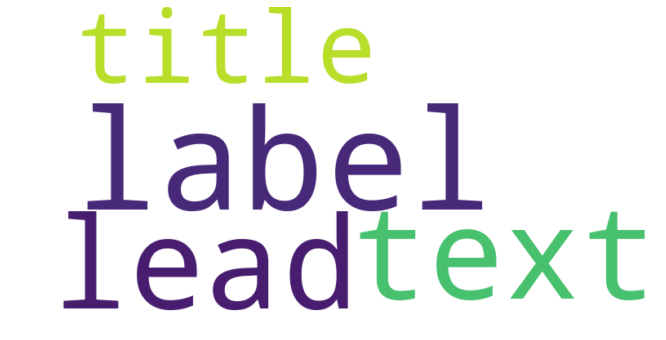

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for label == business using tfidf frequencies

df_bus = df.loc[df['label'] == 'business']


tfidf.fit(df_bus)


feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf.idf_

# Create a dictionary with the feature names and their corresponding TF-IDF scores
wordcloud_dict = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




## Supervised Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

en_stop_words = stopwords.words('english')

text_no_stop_words = df['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in en_stop_words]))
num_words_per_document = text_no_stop_words.apply(lambda x: len(x.split()))

num_words_per_document.head()

##TODO get the most predictive features of the number of words per document using first f_class and then chi2


# f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(tfidf.fit_transform(df['text']), num_words_per_document)
feature_names = tfidf.get_feature_names_out()
selected_features_fclass = [feature_names[i] for i in selector.get_support(indices=True)]
print(selected_features_fclass)


# chi2
selector = SelectKBest(chi2, k=20)
X_new = selector.fit_transform(tfidf.fit_transform(df['text']), num_words_per_document)
feature_names = tfidf.get_feature_names_out()
selected_features_chi2 = [feature_names[i] for i in selector.get_support(indices=True)]
print(selected_features_chi2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['aspx ticker', 'com fullquote', 'fullquote', 'fullquote aspx', 'fullquote gt', 'gt', 'href', 'href http', 'http', 'http www', 'investor reuters', 'lt', 'lt href', 'quickinfo', 'quickinfo fullquote', 'stocks quickinfo', 'strong', 'target stocks', 'www', 'www investor']
['39', 'fullquote', 'gt', 'href', 'href http', 'http', 'http www', 'investor reuters', 'lt', 'lt gt', 'lt href', 'quickinfo', 'quickinfo fullquote', 'reuters', 'reuters com', 'stocks quickinfo', 'strong', 'target stocks', 'www', 'www investor']


Are the results different? What could be a reason for this? 

The f_classif assumes a normal distribution of the data and that the variance of y is equal across all features. chi2 however assumes the data to be categorical. The results are not equal because of the characteristics of the data.

## Huggingface Tokenizers

In [22]:
# # we use distilbert tokenizer
#!pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer

# I used 'text' instead of sentences to avoid having to iterate through every documents.
# To consider multiple sentences however, the 'add_special_tokens' is activated, which, as far as I understood,
# accounts for multiple sentences in the input
tokenized_sentences = dfs['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?

# Number of unique token types
num_unique_tokens = len(set(tokenizer.get_vocab().keys()))

# Total number of tokens
num_tokens = sum([len(sentence) for sentence in tokenized_sentences])

# type/token ratio
type_token_ratio = num_unique_tokens / num_tokens

print(type_token_ratio)

##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"

tokenized_sentences = [tokenizer.tokenize(sentence) for sentence in df['text']]

# Sum of subword tokens starting with '#'
num_subword_tokens = sum([1 for sentence in tokenized_sentences for token in sentence if token.startswith('#')])

print(num_subword_tokens)



12.011806375442738
513340


# Parsing

In [23]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
78333,world,Eight Marines dead in suicide car bombing,A suicide attacker detonated a car bomb yester...,Eight Marines dead in suicide car bombing A su...
29574,sport,"UPDATE 1-Blackburn chance too good to miss, sa...",New Blackburn Rovers manager Mark Hughes says ...,"UPDATE 1-Blackburn chance too good to miss, sa..."
112831,sport,Diamondbacks Keep Busy; Ortiz Heading Home,"ANAHEIM, Calif., (Sports Network) - The Arizo...",Diamondbacks Keep Busy; Ortiz Heading Home AN...
66261,business,Crude price up slightly as market braces for U...,Crude oil prices rose slightly Wednesday after...,Crude price up slightly as market braces for U...
48580,business,Accountant testifies he lied about Enron barge...,A former Enron accountant testified Thursday t...,Accountant testifies he lied about Enron barge...


In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy

def preprocess(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_stop and token.is_punct]
    tokens = [token.lemma_ for token in tokens]
    return tokens

df['preprocessed_text'] = df['text'].apply(preprocess)

### Information Extraction

In [ ]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs
##TODO extract the subject-verbs pairs and print the result for the second document

from collections import Counter
counter = Counter()

##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for verbs-object pairs ('dobj')
##TODO create a list ranking the most common pairs and print the first 10 items

In [ ]:
##TODO do the same for adjectives-nouns pairs ('amod')
##TODO create a list ranking the most common pairs and print the first 10 items

### Exploring cross label dependencies

In [ ]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"

In [ ]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"